/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

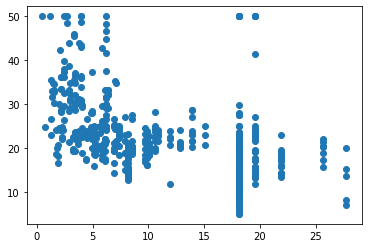

In [12]:
# импортируем необходмимые библиотеки
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

'''
fig, ax = plt.subplots()

ax.scatter(x, y)

plt.show()
'''

from sklearn.datasets import load_boston
boston = load_boston()
#print(boston.DESCR)

import numpy as np
import pandas as pd

columns = ['target'] + list(boston.feature_names)

df = pd.DataFrame(data=np.c_[boston.target, boston.data],
                  columns=columns)

x=df.drop(columns=['target'])
y=df.target

fig, ax = plt.subplots()

ax.scatter(x['INDUS'], y)

plt.show()
     



In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (354, 13), (354,)
Test dataset size: (152, 13), (152,)


In [31]:
model = LinearRegression()
model.fit(X_train, y_train)
w0 = model.intercept_
#w0
w1 = model.coef_
#w1
#print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Свободный коэффицент уравнения w0: 38.30778414692815


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


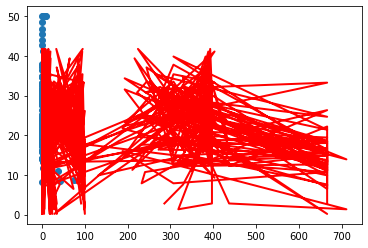

In [37]:
y_pred = model.predict(X_test)

plt.scatter(X_test['CRIM'], list(y_test))
plt.plot(X_test, y_pred, color='red', linewidth=2);
plt.show()

#X_test['CRIM']
#list(y_test)


In [39]:
mse = 0 
test = list(y_test)
for i in range(len(list(y_pred))):
  mse = mse + (y_pred[i]-test[i])**2
mse/len(test)

24.16336753998354

In [40]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 3.393291338712921
Mean Squared Error: 24.16336753998354
R2 score: 0.7046439103408569
